# Task #1: Prediction using Supervised ML

Predicting the percentage of a student based on the number of study hours.

- Hala Ashraf Kamel El-Kady

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
df = pd.read_csv('http://bit.ly/w-data')
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
df.shape

(25, 2)

In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


<AxesSubplot:title={'center':'Scatterplot of hours and score percentages'}, xlabel='Hours', ylabel='Scores'>

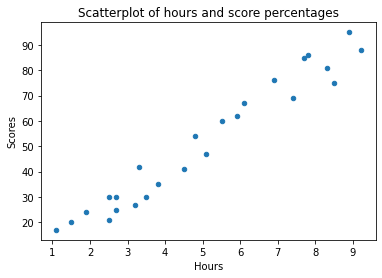

In [6]:
df.plot.scatter(x='Hours',y='Scores',title='Scatterplot of hours and score percentages')

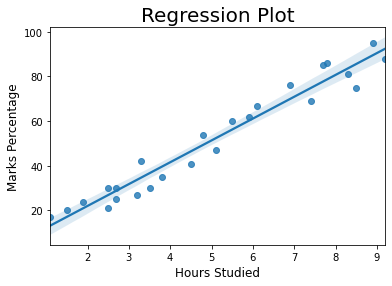

In [7]:
sns.regplot(x= df['Hours'], y= df['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

In [8]:
print(df.corr())

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


# Model Training

In [9]:
# Defining X and y from the Data
x = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print(x_train)
print(y_train)

[[3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]]
[35 24 86 76 17 47 85 42 81 88 67 30 25 60 30 75 21 54 95 41]


In [11]:
reg= LinearRegression()

reg.fit(x_train,y_train)

LinearRegression()

In [12]:
y_pred = reg.predict(x_test)

In [13]:
pred = pd.DataFrame({'Hours': [i[0] for i in x_test], 'Predicted Score Percentage': [k for k in y_pred]})
pred

,Hours,Predicted Score Percentage
0,1.5,16.884145
1,3.2,33.732261
2,7.4,75.357018
3,2.5,26.794801
4,5.9,60.491033


In [14]:
# Comparing Actual marks and Predicted marks
comparison = pd.DataFrame({'Actual Scores': y_test, 'Predicted Scores': y_pred})
comparison

,Actual Scores,Predicted Scores
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


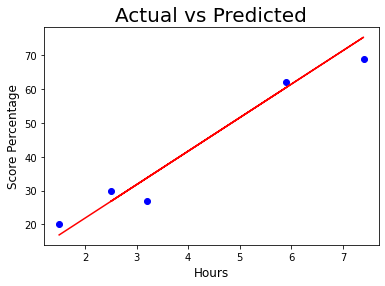

In [15]:
# Actual values in blue
plt.scatter(x=x_test, y=y_test, color='blue')

# Predicted values in red
plt.plot(x_test, y_pred, color='red')

plt.title('Actual vs Predicted', size=20)
plt.ylabel('Score Percentage', size=12)
plt.xlabel('Hours', size=12)
plt.show()

# Model Evaluation

In [16]:
print('Mean absolute error: ',mean_absolute_error(y_test,y_pred))

Mean absolute error:  4.183859899002975


# What will the predicted score be if a student studies for 9.25 hrs/day?

In [17]:
hrs = [9.25]
score_pred = reg.predict([hrs])
print("Predicted Score = {}".format(round(score_pred[0],3)))

Predicted Score = 93.692
